# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [1]:
! pip install Pillow

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [3]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (10/10), 11.01 MiB | 18.48 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [4]:
!ls MNIST

processed  raw


In [5]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [6]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(np.float64(-0.5), np.float64(232.5), np.float64(87.5), np.float64(-0.5))

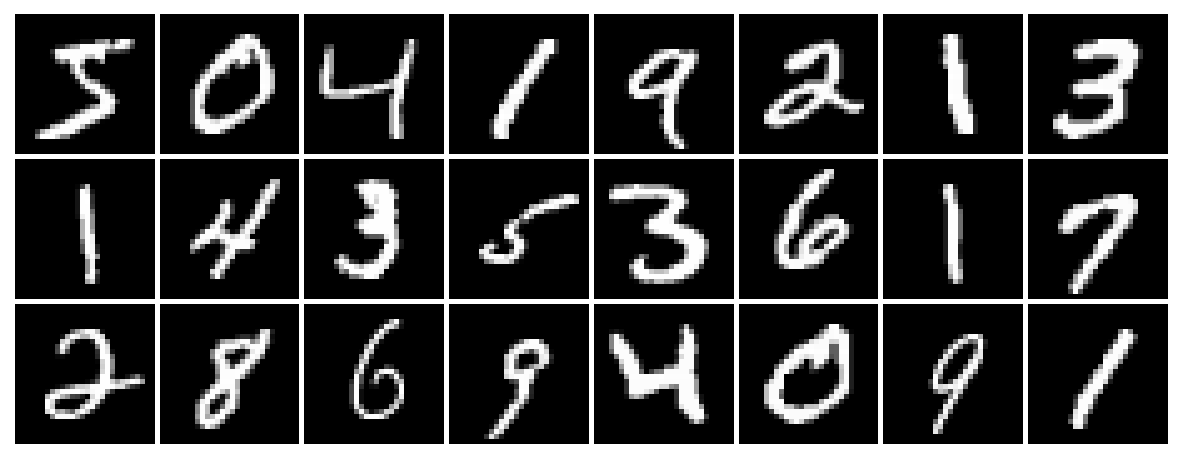

In [7]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


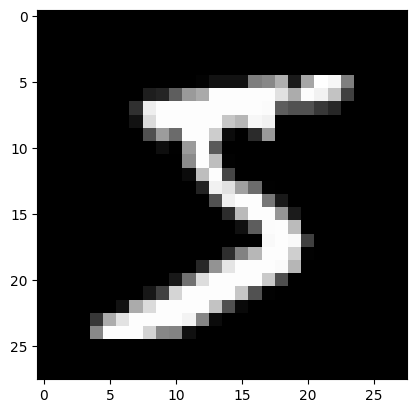

In [8]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

## Modelo

In [9]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

### Testando um predict com poucas amostras

In [10]:
xin = x_train[:5].view(-1,28*28)
score = model(Variable(xin))
score

tensor([[-0.0265, -0.0852,  0.1182, -0.1778,  0.1751, -0.3411,  0.0530,  0.0930,
          0.1294,  0.0949],
        [-0.1132, -0.2806,  0.0874, -0.0147, -0.0933, -0.0796, -0.4424,  0.0884,
         -0.0738, -0.1193],
        [ 0.1056, -0.2335, -0.0781, -0.0143,  0.1045, -0.0055, -0.1852,  0.0229,
          0.0902,  0.1397],
        [-0.1341, -0.2745,  0.0989, -0.0756,  0.0817, -0.3157,  0.0343,  0.0784,
         -0.0685,  0.1687],
        [-0.1591, -0.3823,  0.0461, -0.0486,  0.0261, -0.1466,  0.0518,  0.1827,
          0.1681, -0.0501]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [11]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [12]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.7 MB/s eta 0:00:00
  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-4scfst0g
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-4scfst0g
  Resolved https://github.com/szagoruyko/pytorchviz to commit 5cf04c13e601366f6b9cf5939b5af5144d55b887
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=5037 sha256=6e4e218327da86e2cbe0585752a533e41593b1d4fce04f2eef2cbe9f3c4466a0
  Stored in directory: /tmp/pip-ephem-wheel-cache-0wqmonw2/wheels/63/59/c1/3342e0bca82db7c512109b8da472d40be5c95cca7ce5363332
Successfully built torchviz


In [13]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.3483, grad_fn=<NllLossBackward0>)

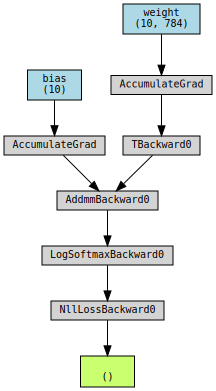

In [14]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

In [15]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()


In [16]:
print('Final loss:', loss.item())

Final loss: 0.26522812247276306


### Visualizando gráfico de perda durante o treinamento

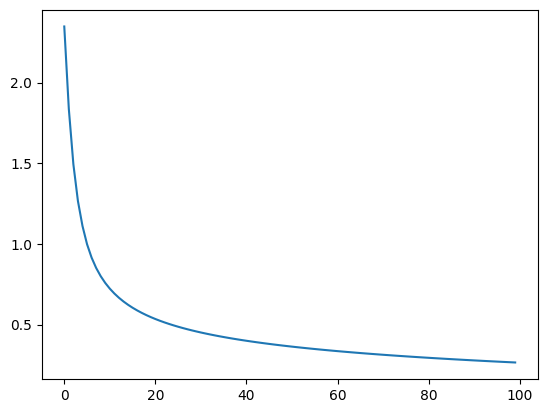

In [17]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [18]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.942


### Matriz de confusão com dados de treinamento e teste

In [19]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,96,0,1,0,0,0,1,0,0,2
1,0,110,1,0,0,0,2,2,1,0
2,0,1,91,2,0,1,1,1,1,1
3,0,0,0,87,0,2,0,0,0,0
4,0,0,1,0,102,2,0,2,0,3
5,0,2,0,1,0,82,0,0,2,1
6,1,0,1,1,2,2,90,0,0,0
7,0,1,1,1,0,0,0,111,0,3
8,0,2,2,0,0,1,0,0,83,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


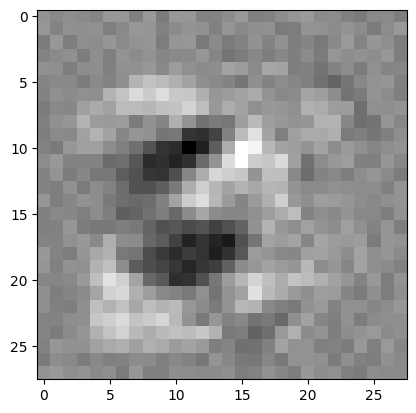

In [20]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

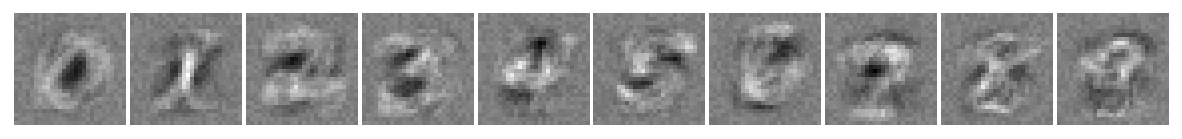

In [21]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

Epoch [1/100], Loss: 0.177947, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


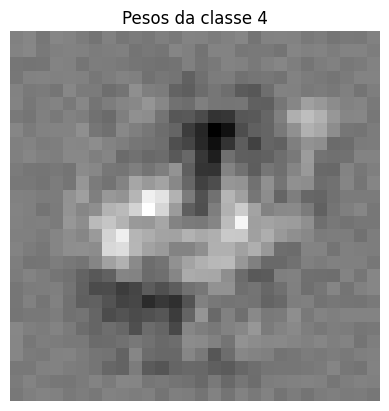

Epoch [2/100], Loss: 0.177374, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


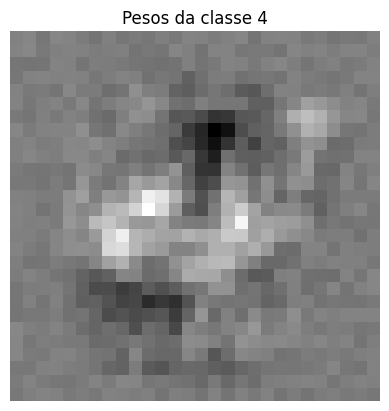

Epoch [3/100], Loss: 0.176804, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


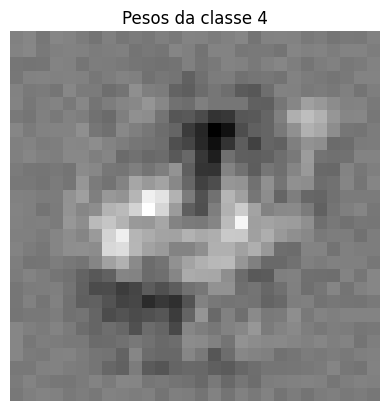

Epoch [4/100], Loss: 0.176238, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


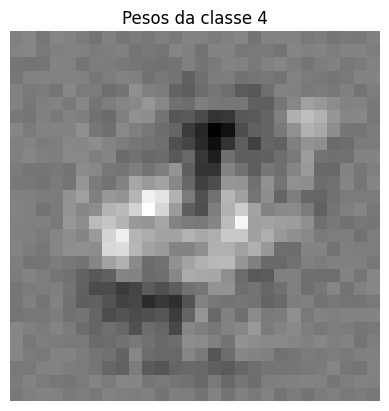

Epoch [5/100], Loss: 0.175675, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


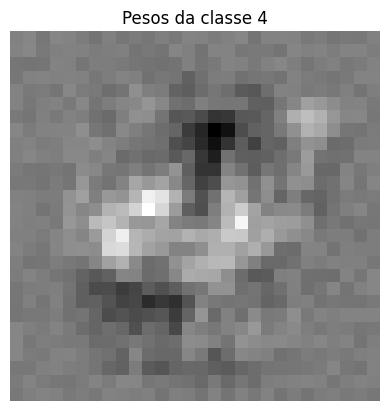

Epoch [6/100], Loss: 0.175116, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


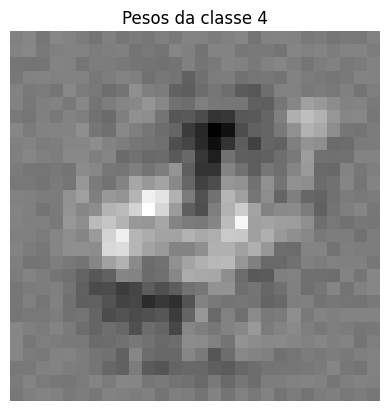

Epoch [7/100], Loss: 0.174560, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


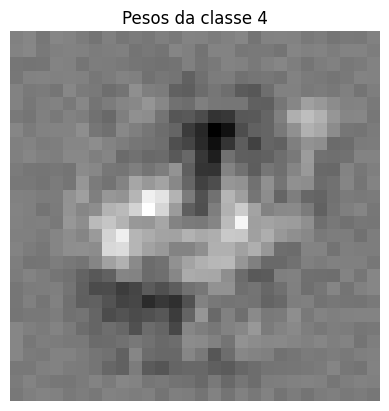

Epoch [8/100], Loss: 0.174007, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


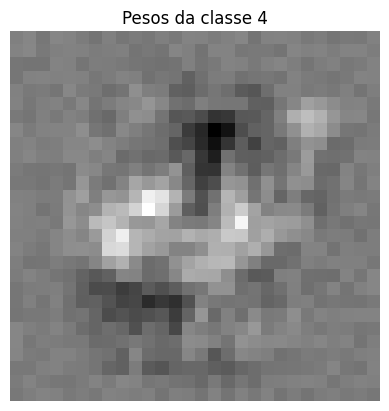

Epoch [9/100], Loss: 0.173458, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


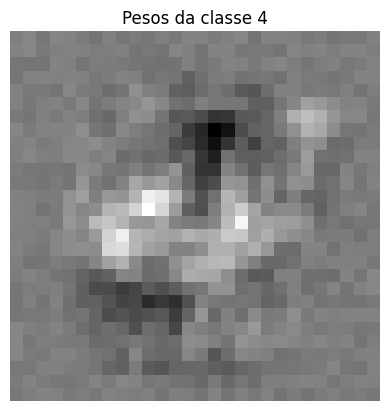

Epoch [10/100], Loss: 0.172912, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


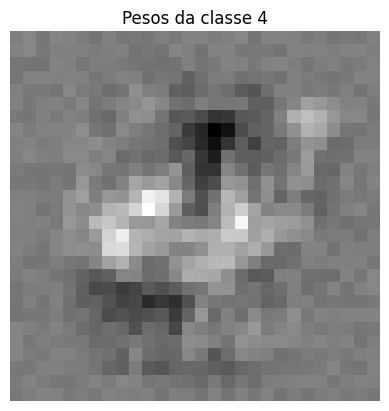

Epoch [11/100], Loss: 0.172369, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


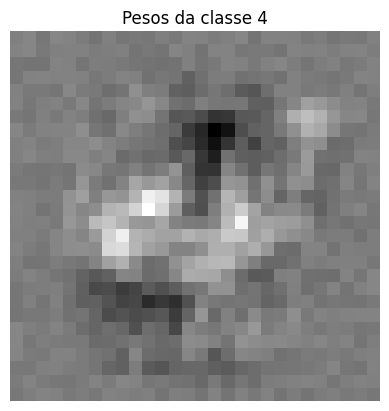

Epoch [12/100], Loss: 0.171830, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


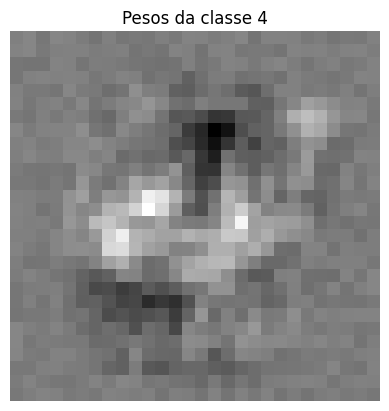

Epoch [13/100], Loss: 0.171294, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


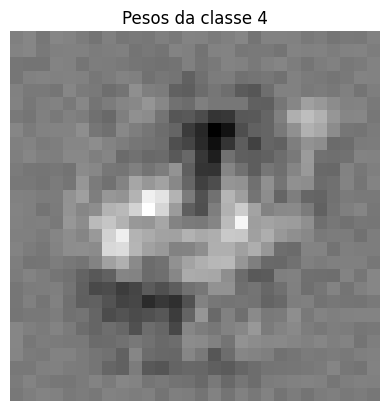

Epoch [14/100], Loss: 0.170761, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


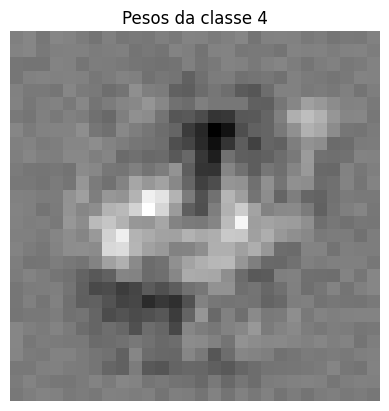

Epoch [15/100], Loss: 0.170231, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


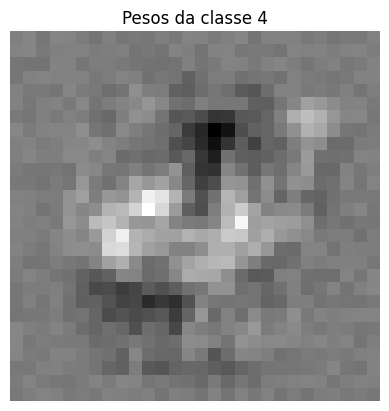

Epoch [16/100], Loss: 0.169704, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


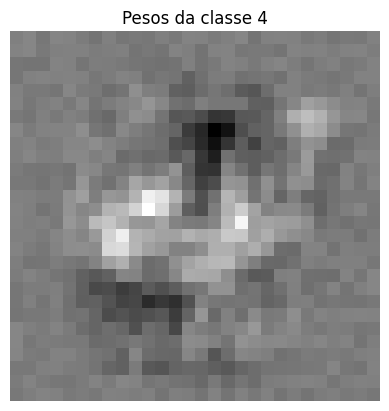

Epoch [17/100], Loss: 0.169180, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


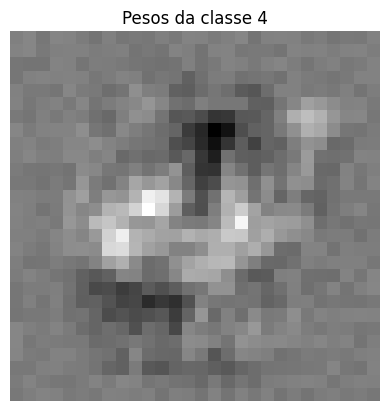

Epoch [18/100], Loss: 0.168660, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


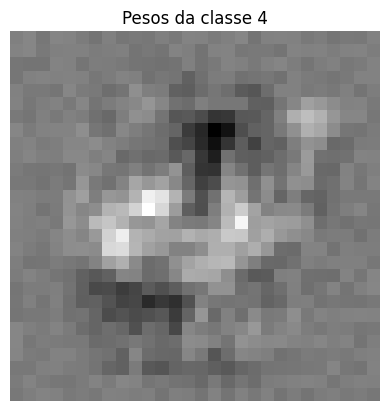

Epoch [19/100], Loss: 0.168142, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


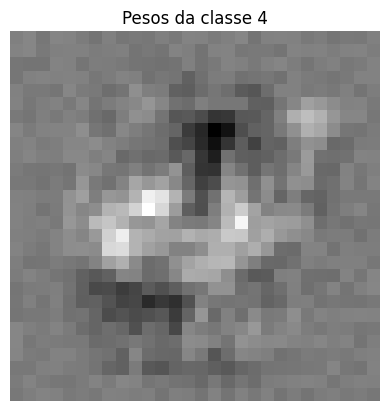

Epoch [20/100], Loss: 0.167627, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


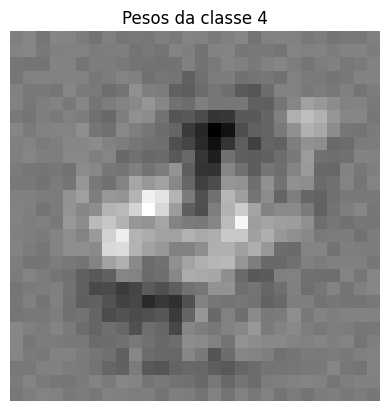

Epoch [21/100], Loss: 0.167116, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


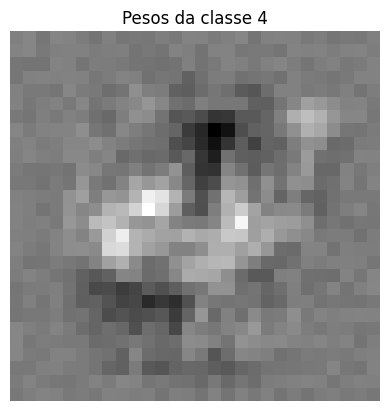

Epoch [22/100], Loss: 0.166607, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


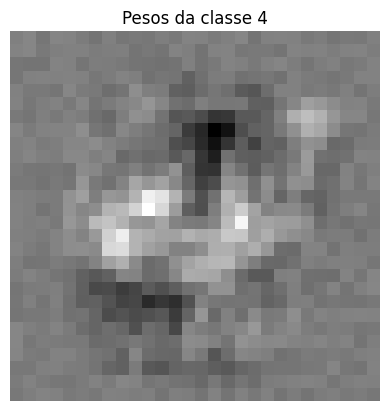

Epoch [23/100], Loss: 0.166101, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


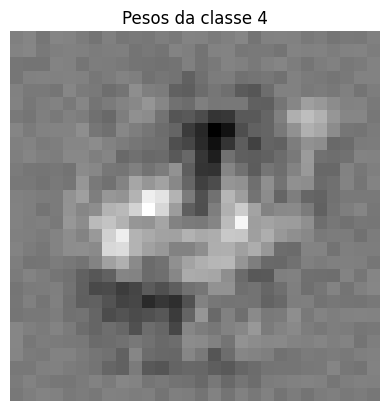

Epoch [24/100], Loss: 0.165598, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


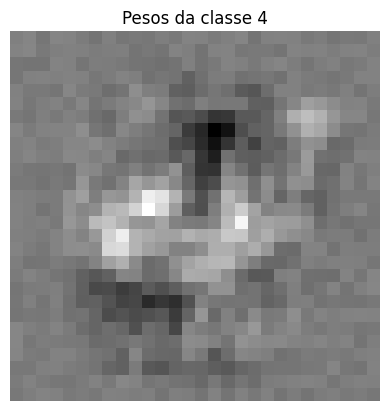

Epoch [25/100], Loss: 0.165098, Accuracy: 0.967000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


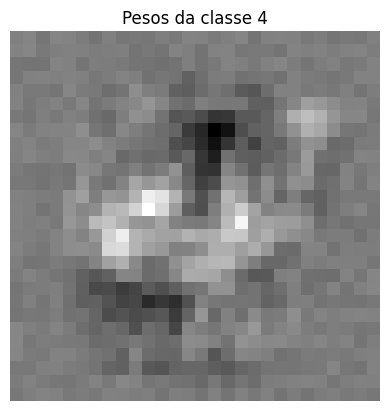

Epoch [26/100], Loss: 0.164601, Accuracy: 0.968000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


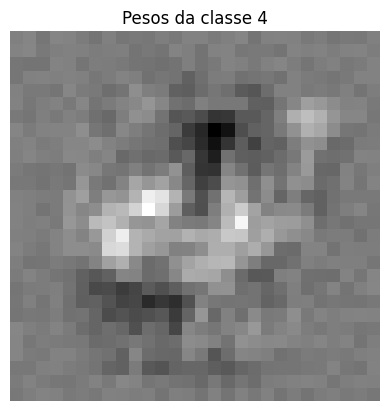

Epoch [27/100], Loss: 0.164106, Accuracy: 0.968000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


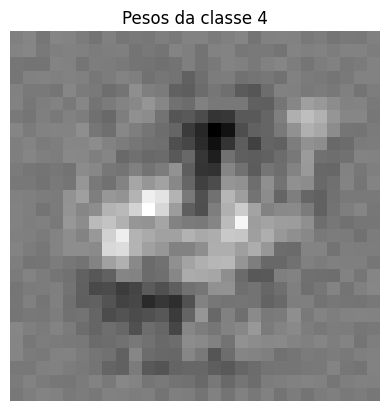

Epoch [28/100], Loss: 0.163615, Accuracy: 0.968000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


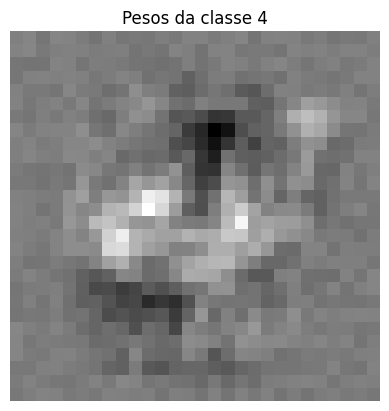

Epoch [29/100], Loss: 0.163126, Accuracy: 0.969000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


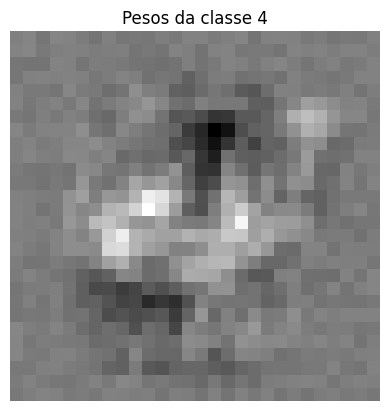

Epoch [30/100], Loss: 0.162640, Accuracy: 0.969000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


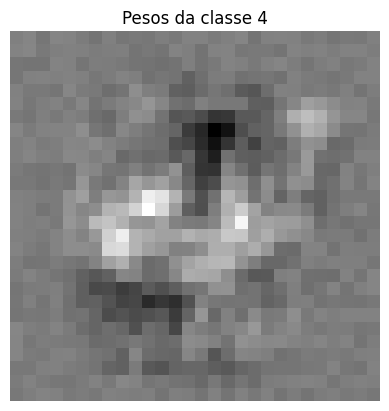

Epoch [31/100], Loss: 0.162156, Accuracy: 0.970000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


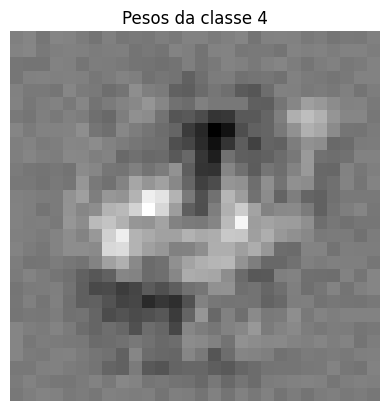

Epoch [32/100], Loss: 0.161675, Accuracy: 0.970000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


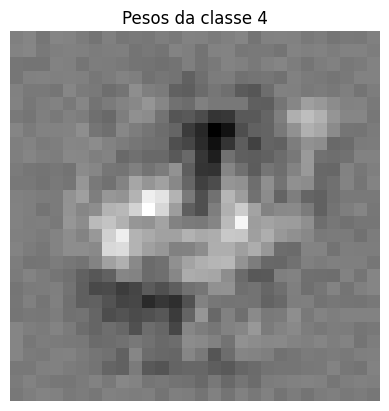

Epoch [33/100], Loss: 0.161197, Accuracy: 0.970000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


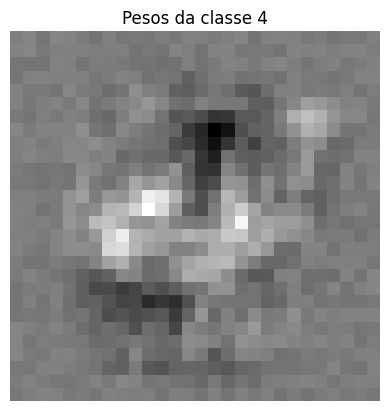

Epoch [34/100], Loss: 0.160722, Accuracy: 0.970000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


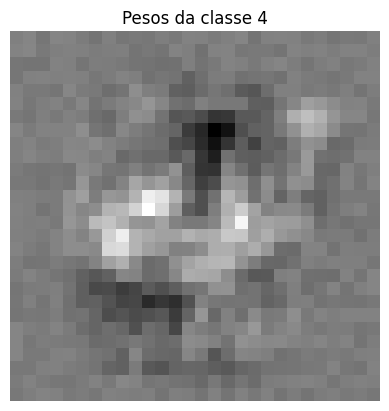

Epoch [35/100], Loss: 0.160249, Accuracy: 0.970000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


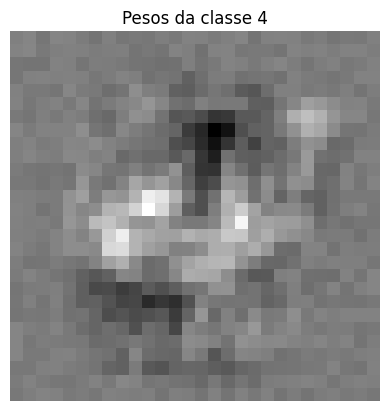

Epoch [36/100], Loss: 0.159779, Accuracy: 0.970000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


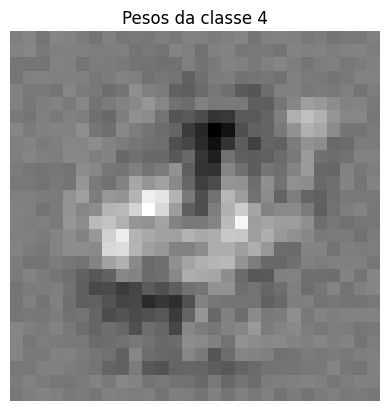

Epoch [37/100], Loss: 0.159311, Accuracy: 0.971000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


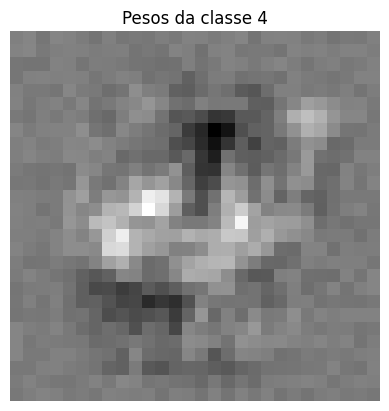

Epoch [38/100], Loss: 0.158846, Accuracy: 0.971000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


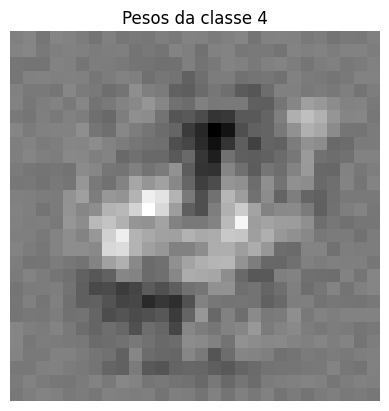

Epoch [39/100], Loss: 0.158383, Accuracy: 0.971000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


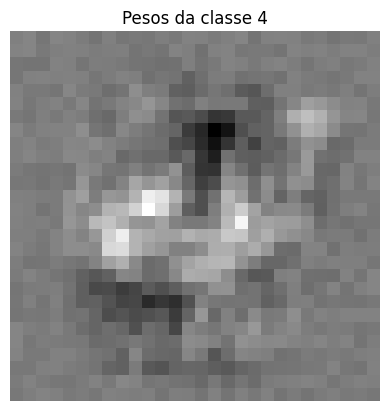

Epoch [40/100], Loss: 0.157923, Accuracy: 0.972000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


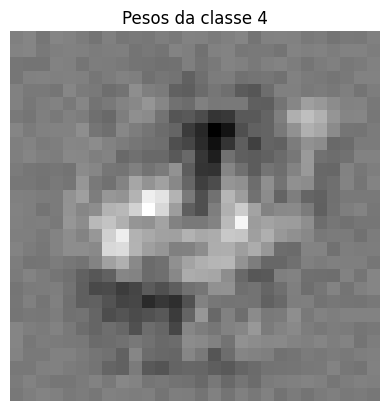

Epoch [41/100], Loss: 0.157465, Accuracy: 0.972000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


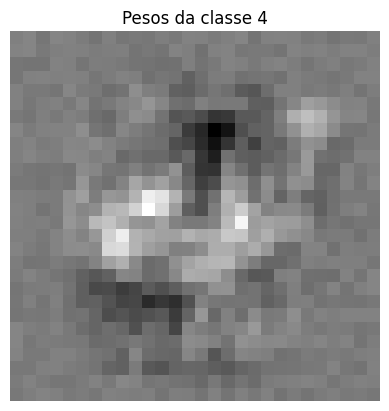

Epoch [42/100], Loss: 0.157010, Accuracy: 0.972000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


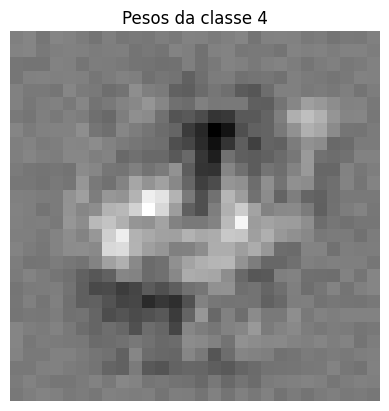

Epoch [43/100], Loss: 0.156557, Accuracy: 0.972000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


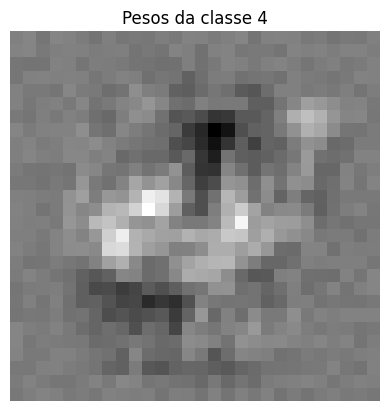

Epoch [44/100], Loss: 0.156107, Accuracy: 0.973000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


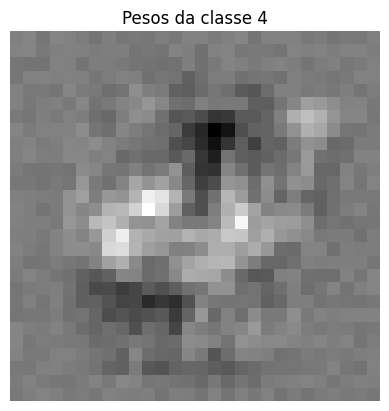

Epoch [45/100], Loss: 0.155659, Accuracy: 0.973000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


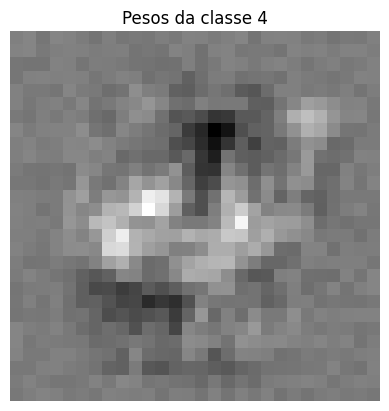

Epoch [46/100], Loss: 0.155213, Accuracy: 0.973000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


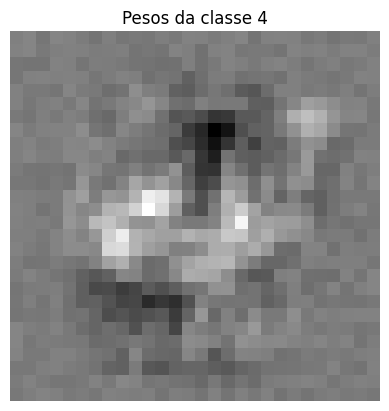

Epoch [47/100], Loss: 0.154770, Accuracy: 0.973000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


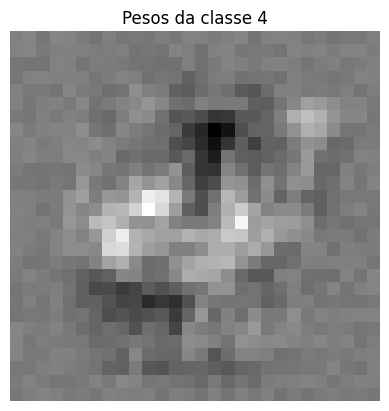

Epoch [48/100], Loss: 0.154329, Accuracy: 0.974000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


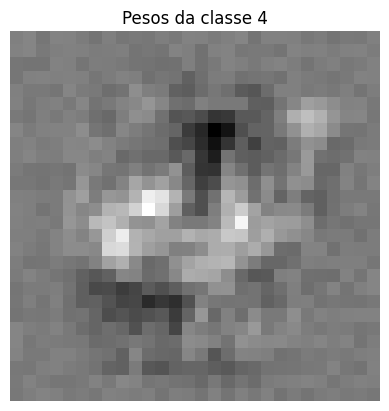

Epoch [49/100], Loss: 0.153890, Accuracy: 0.974000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


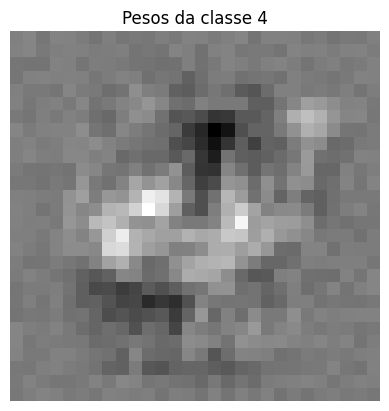

Epoch [50/100], Loss: 0.153454, Accuracy: 0.974000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


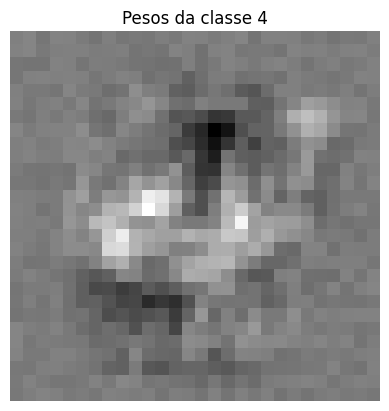

Epoch [51/100], Loss: 0.153020, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


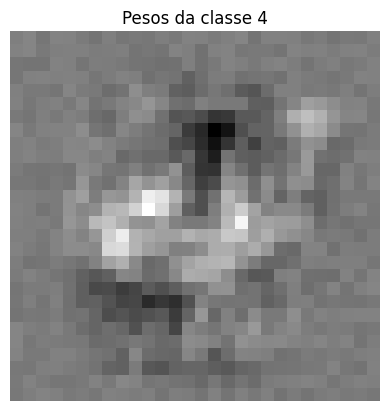

Epoch [52/100], Loss: 0.152588, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


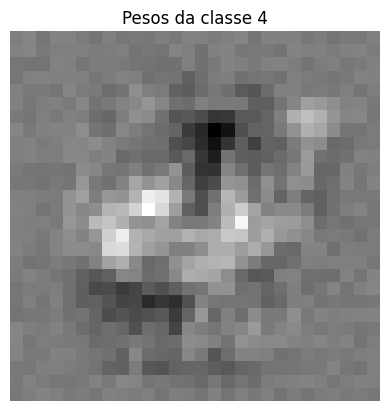

Epoch [53/100], Loss: 0.152158, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


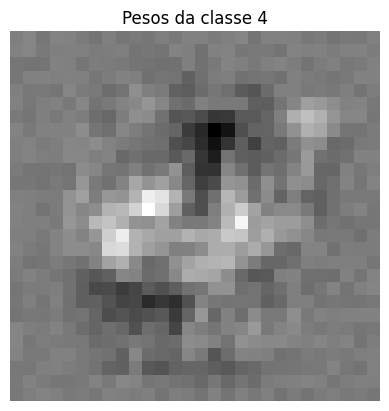

Epoch [54/100], Loss: 0.151731, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


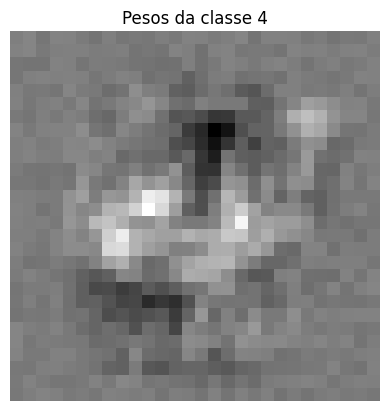

Epoch [55/100], Loss: 0.151306, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


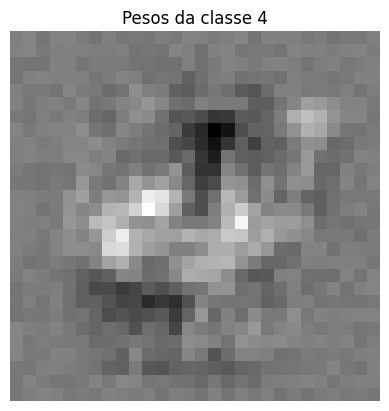

Epoch [56/100], Loss: 0.150883, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


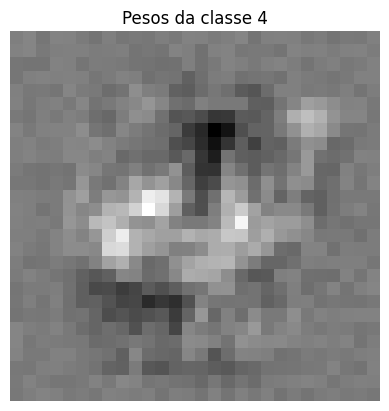

Epoch [57/100], Loss: 0.150462, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


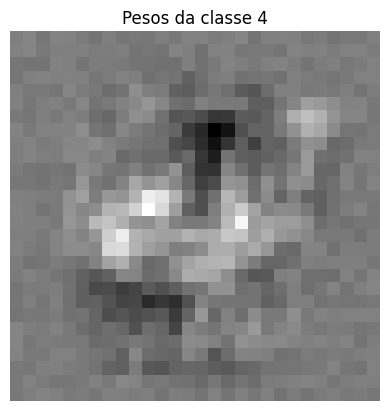

Epoch [58/100], Loss: 0.150043, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


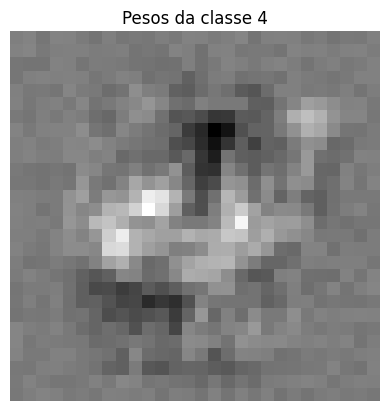

Epoch [59/100], Loss: 0.149627, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


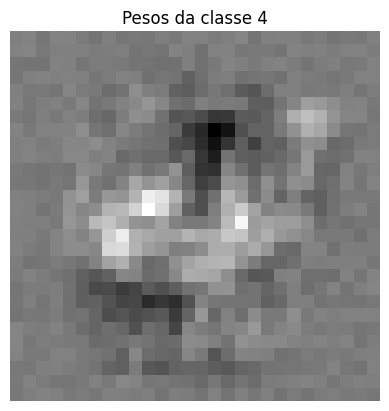

Epoch [60/100], Loss: 0.149212, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


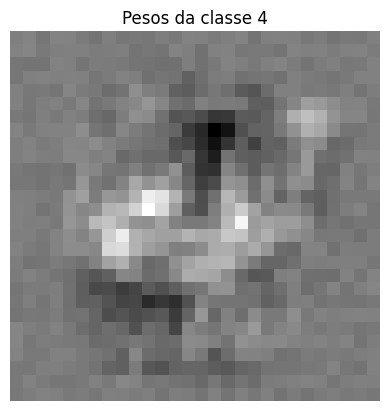

Epoch [61/100], Loss: 0.148800, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


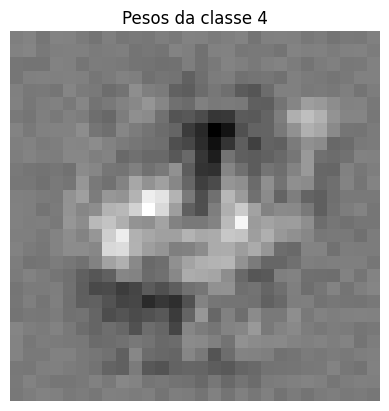

Epoch [62/100], Loss: 0.148390, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


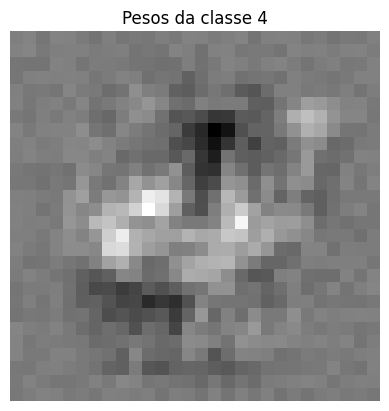

Epoch [63/100], Loss: 0.147982, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


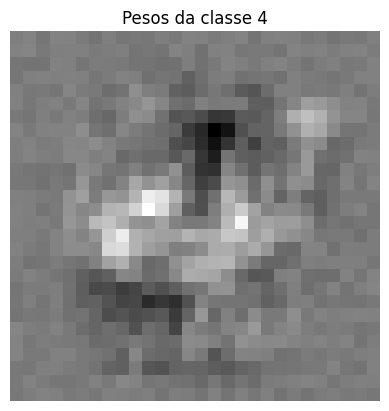

Epoch [64/100], Loss: 0.147576, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


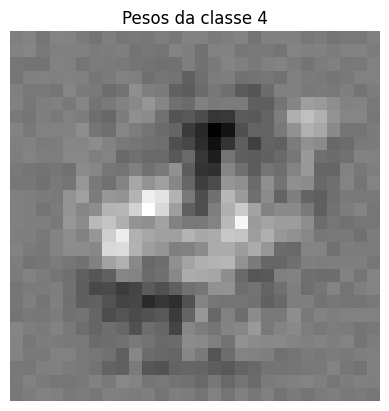

Epoch [65/100], Loss: 0.147172, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


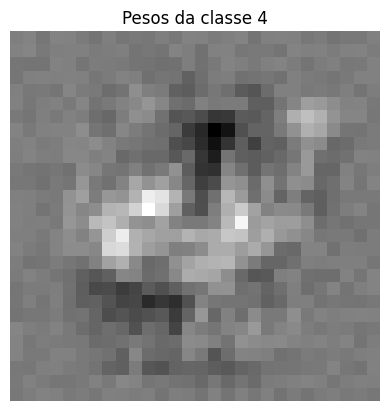

Epoch [66/100], Loss: 0.146770, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


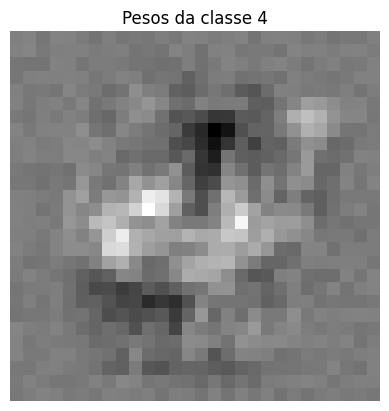

Epoch [67/100], Loss: 0.146369, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


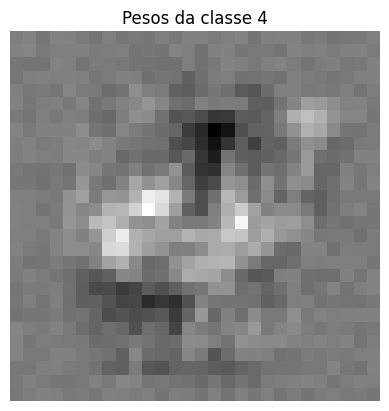

Epoch [68/100], Loss: 0.145971, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


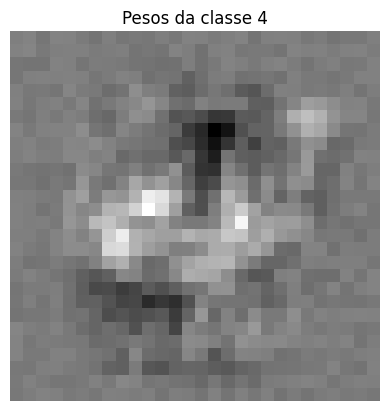

Epoch [69/100], Loss: 0.145575, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


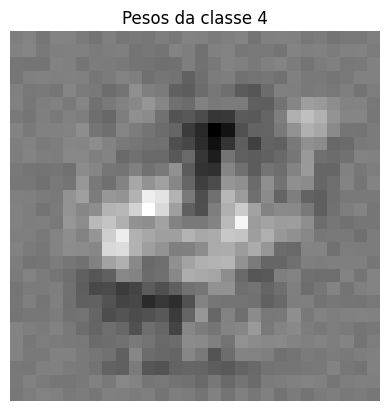

Epoch [70/100], Loss: 0.145181, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


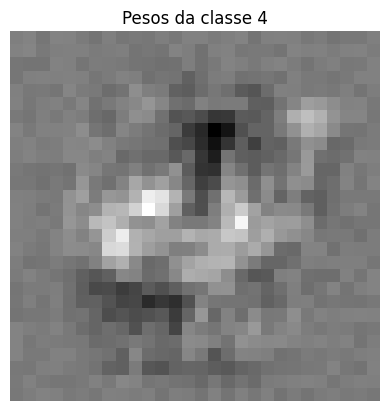

Epoch [71/100], Loss: 0.144789, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


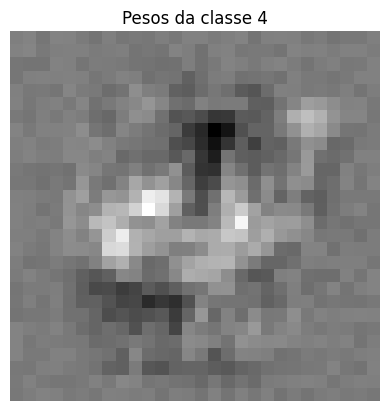

Epoch [72/100], Loss: 0.144399, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


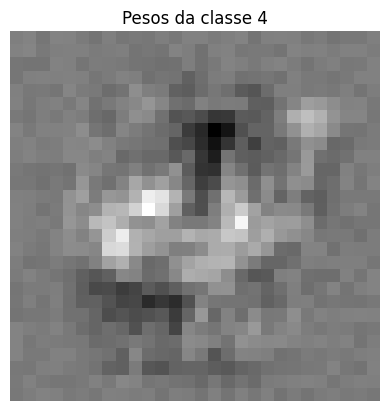

Epoch [73/100], Loss: 0.144010, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


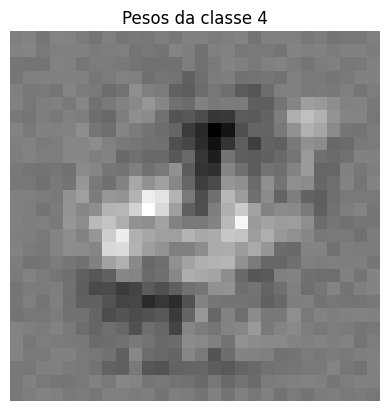

Epoch [74/100], Loss: 0.143624, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


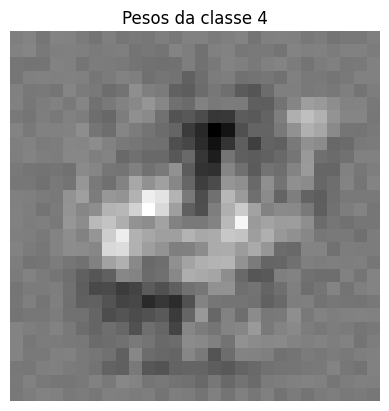

Epoch [75/100], Loss: 0.143239, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


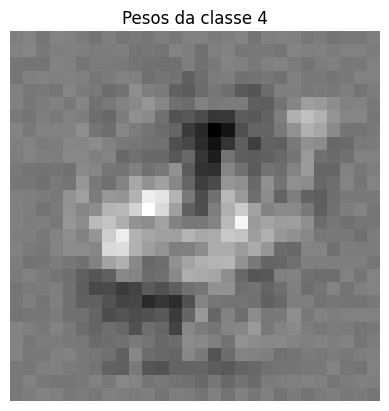

Epoch [76/100], Loss: 0.142856, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


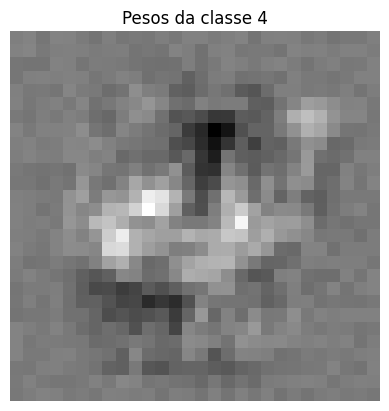

Epoch [77/100], Loss: 0.142476, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


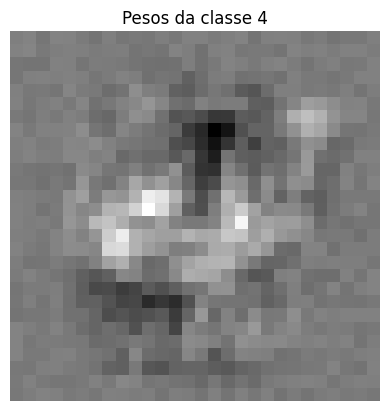

Epoch [78/100], Loss: 0.142097, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


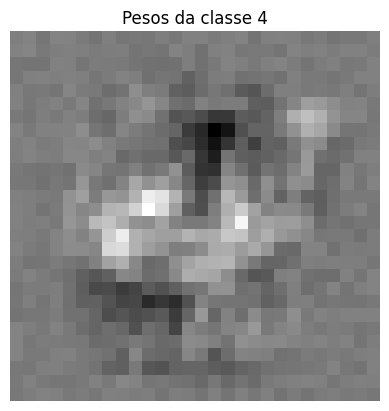

Epoch [79/100], Loss: 0.141719, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


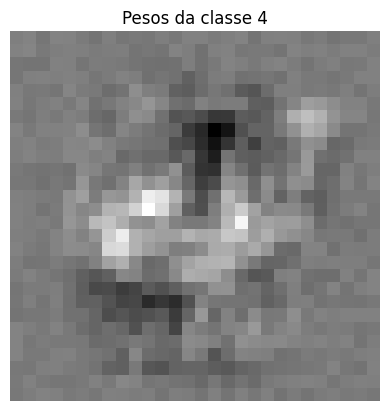

Epoch [80/100], Loss: 0.141344, Accuracy: 0.975000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


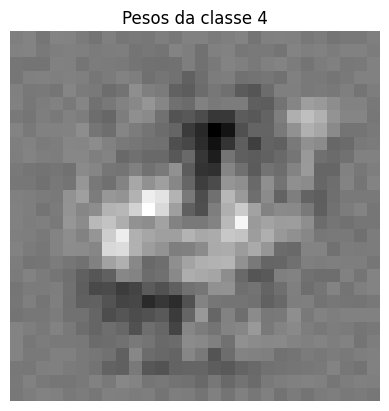

Epoch [81/100], Loss: 0.140970, Accuracy: 0.976000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


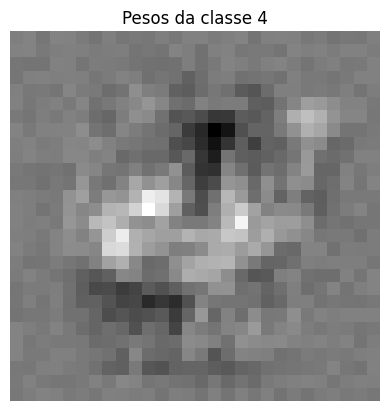

Epoch [82/100], Loss: 0.140599, Accuracy: 0.976000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


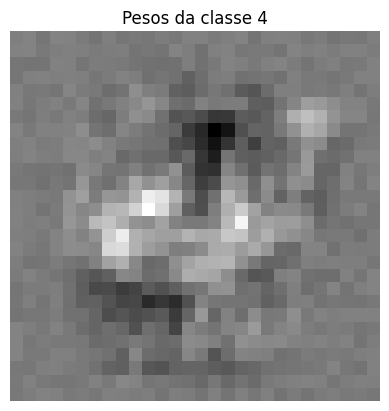

Epoch [83/100], Loss: 0.140229, Accuracy: 0.976000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


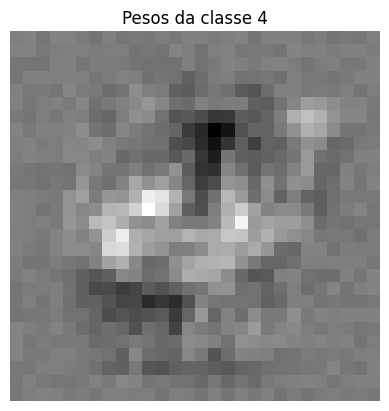

Epoch [84/100], Loss: 0.139860, Accuracy: 0.976000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


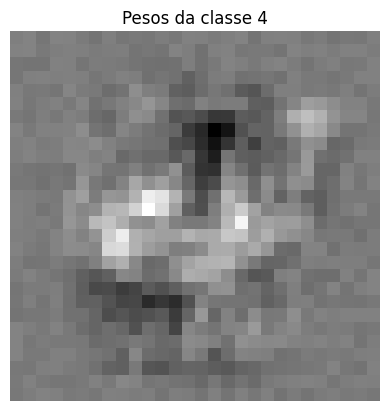

Epoch [85/100], Loss: 0.139494, Accuracy: 0.976000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


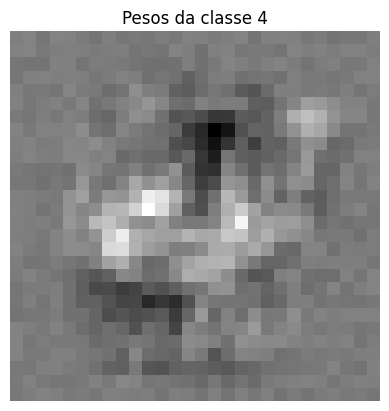

Epoch [86/100], Loss: 0.139129, Accuracy: 0.976000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


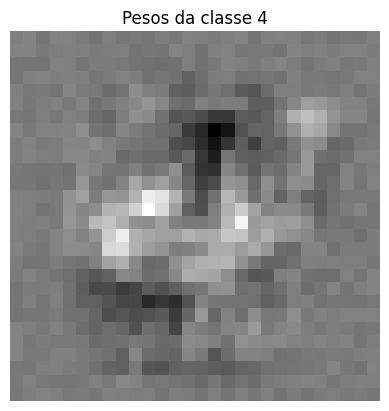

Epoch [87/100], Loss: 0.138766, Accuracy: 0.976000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


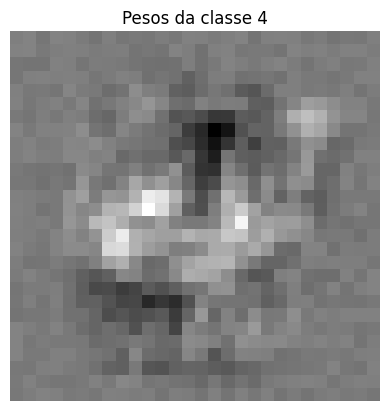

Epoch [88/100], Loss: 0.138405, Accuracy: 0.976000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


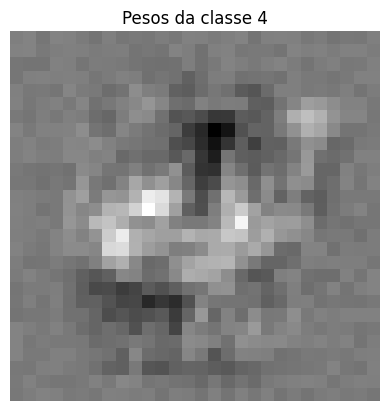

Epoch [89/100], Loss: 0.138045, Accuracy: 0.976000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


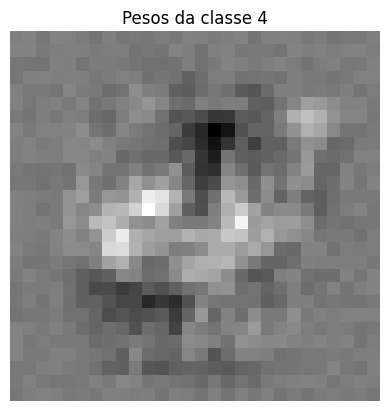

Epoch [90/100], Loss: 0.137687, Accuracy: 0.976000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


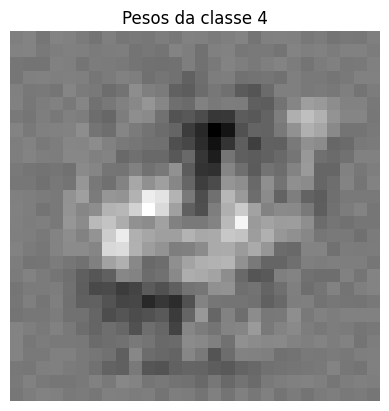

Epoch [91/100], Loss: 0.137331, Accuracy: 0.976000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


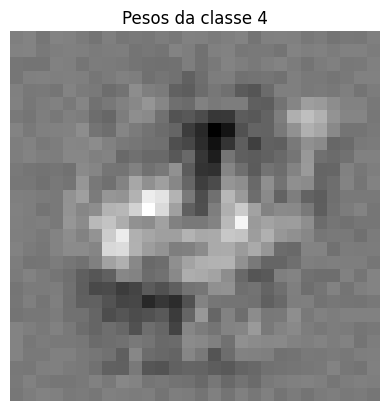

Epoch [92/100], Loss: 0.136976, Accuracy: 0.976000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


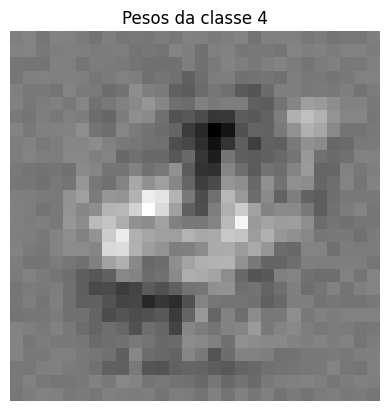

Epoch [93/100], Loss: 0.136624, Accuracy: 0.976000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


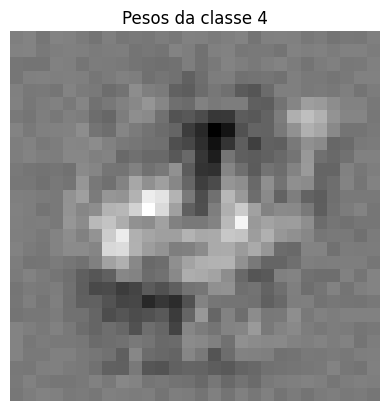

Epoch [94/100], Loss: 0.136272, Accuracy: 0.976000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


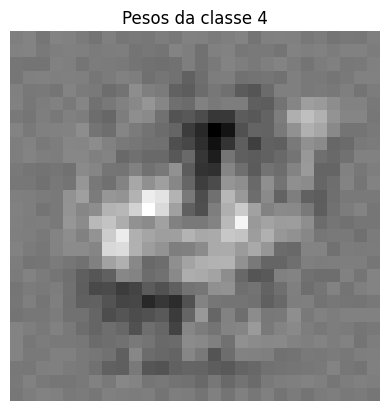

Epoch [95/100], Loss: 0.135923, Accuracy: 0.977000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


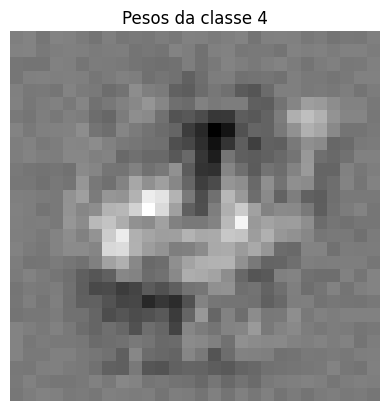

Epoch [96/100], Loss: 0.135575, Accuracy: 0.977000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


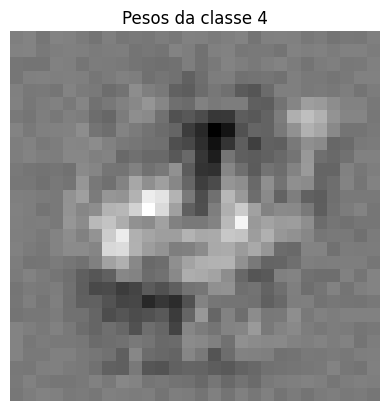

Epoch [97/100], Loss: 0.135228, Accuracy: 0.977000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


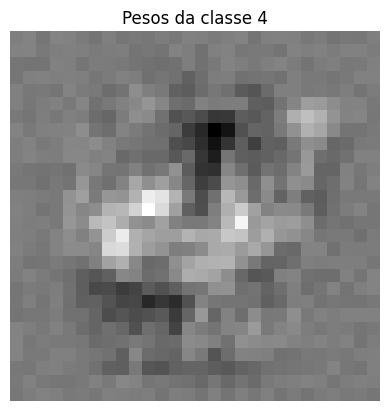

Epoch [98/100], Loss: 0.134883, Accuracy: 0.977000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


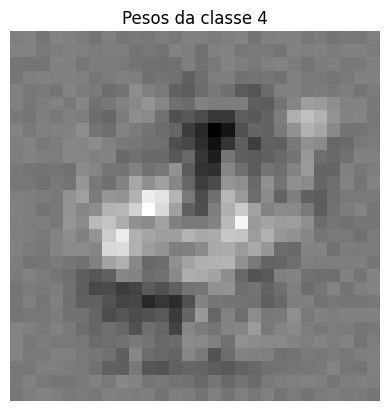

Epoch [99/100], Loss: 0.134540, Accuracy: 0.977000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


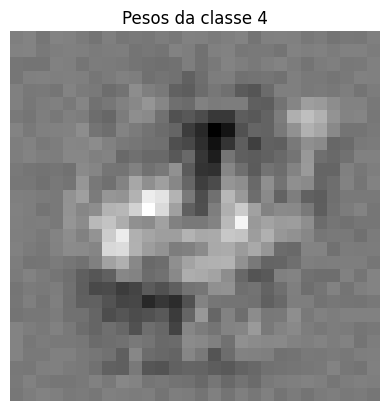

Epoch [100/100], Loss: 0.134198, Accuracy: 0.977000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


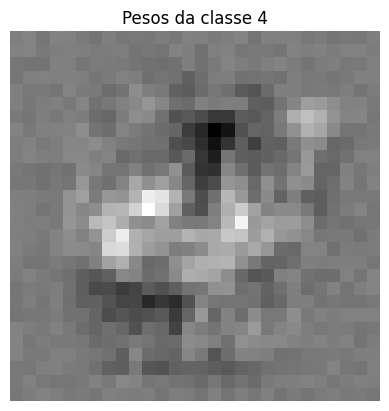

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch

losses = []
zs = []

for i in range(epochs):
    model.train()

    # Flatten a imagem: [batch_size, 1, 28, 28] -> [batch_size, 784]
    inputs = Variable(x_train.view(-1, 28 * 28))
    targets = Variable(y_train)

    # Forward
    outputs = model(inputs)

    # Salva os logits (antes da softmax) do primeiro exemplo da batch
    zs.append(outputs[0].detach().cpu().numpy())

    # Calcula a perda
    loss = criterion(outputs, targets)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    # Cálculo da acurácia
    _, predicts = torch.max(outputs, 1)
    correct = (predicts == y_train).sum().item()
    accuracy = correct / y_train.size(0)

    print('Epoch [{}/{}], Loss: {:.6f}, Accuracy: {:.6f}'
          .format(i+1, epochs, loss.item(), accuracy))

    # Visualizar pesos da classe 4 (index 4)
    with torch.no_grad():
        weights = model.state_dict()['weight']
        bias = model.state_dict()['bias']

        print('weights:', weights.shape)
        print('bias:   ', bias.shape)

        plt.imshow(weights[4].cpu().numpy().reshape((28, 28)), cmap='gray')
        plt.title("Pesos da classe 4")
        plt.axis('off')
        plt.show()


<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

## Perguntas

1. Qual é o shape da matriz de entrada na rede? (60000, 28*28)
2. Qual é o shape da saída da rede? (60000, 10)
3. Qual é o número total de parâmetros da rede, incluindo o bias? 784*10 + 10 = 7850

# Aprendizados
